In [1]:
import os, sys, time, resource, re, gc, shutil
from multiprocess import Pool
from functools import partial
from tabulate import tabulate
from urllib.parse import urlparse, parse_qsl

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mongoengine.queryset.visitor import Q
import django
from django.db.models import Count
sys.path.append('/home/galm/software/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from tmv_app.models import *
from django.db.models import F

In [2]:
dts = DocTopic.objects.filter(run_id=66).values('topic__title')

dts = dts.annotate(
    ipcc = models.Sum(
        models.Case(
            models.When(doc__ipccref__isnull=False,then=F('score')),default=0, output_field=models.FloatField()
        )
    ),
    no_ipcc = models.Sum(
        models.Case(
            models.When(doc__ipccref__isnull=True,then=F('score')),default=0, output_field=models.FloatField()
        )
    )
)
df =  pd.DataFrame.from_dict(list(dts))

In [3]:
df['total'] = df.ipcc+df.no_ipcc
df['ipcc_pcnt'] = df.ipcc/df.total*100
df = df.sort_values(by='ipcc_pcnt', ascending=0).reset_index(drop=True)
df.head()

,ipcc,no_ipcc,topic__title,total,ipcc_pcnt
0,35.502459,141.593966,"{aerosol, forc, radiat}",177.096425,20.046966
1,25.407750,134.568095,"{ozon, stratospher, tropospher}",159.975845,15.882241
2,24.221826,132.189984,"{cloud, radiat, feedback}",156.411810,15.485932
3,37.848371,233.171063,"{ocean, marin, atmospher}",271.019434,13.965187
4,36.325894,226.227519,"{adapt, vulner, strategi}",262.553413,13.835621


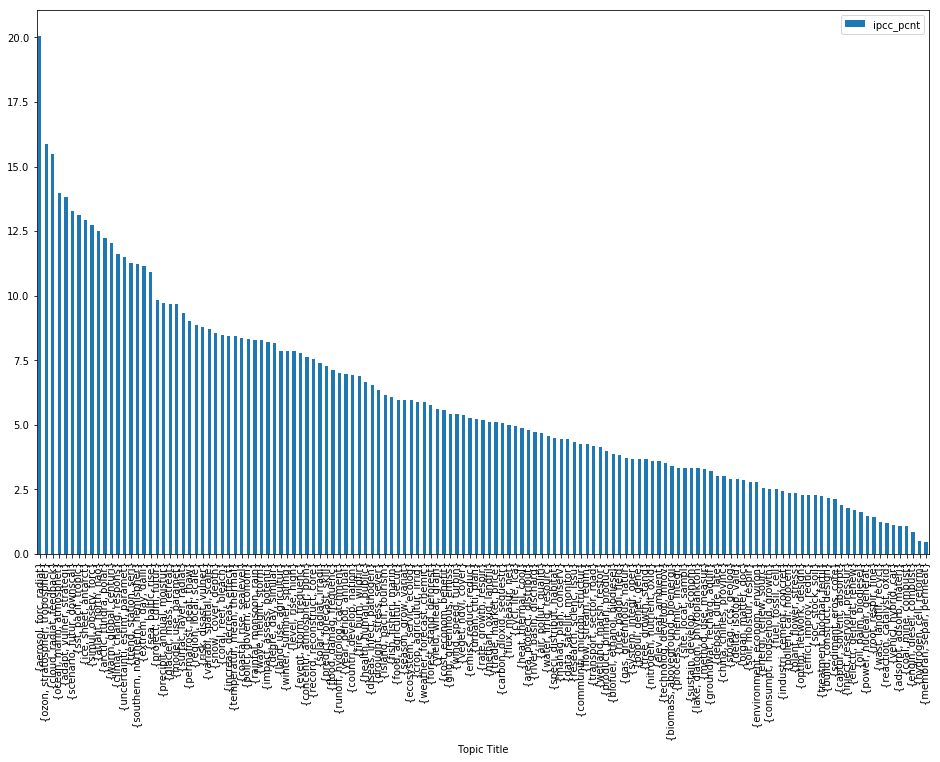

In [4]:
plt.rcParams["figure.figsize"] = [16,10]
bdf = df.set_index(['topic__title'])[['ipcc_pcnt']]
bdf.plot.bar();
plt.xlabel('Topic Title')
plt.savefig('../plots/ipcc_topics_66.png',bbox_inches='tight')   
plt.show()